In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("cleaned_openpowerlifting.csv", low_memory = False)

In [3]:
rows, columns = data.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 738096
Number of columns: 39


In [4]:
data = data[data['Sex'].isin(['M', 'F'])]

In [5]:
male_data = data[data['Sex'] == 'M']
female_data = data[data['Sex'] == 'F']

In [6]:
male_data["TotalKg"].count()

511516

In [7]:
female_data["TotalKg"].count()

226503

In [8]:
print("Male Lifters Summary:")
print(male_data[['Age', 'BodyweightKg', 'TotalKg', 'Dots']].describe())

Male Lifters Summary:
                 Age   BodyweightKg        TotalKg           Dots
count  511516.000000  511516.000000  511516.000000  511516.000000
mean       31.325331      90.231759     433.365812     285.554470
std        13.887657      21.102471     219.607232     138.347626
min         0.500000      17.600000       5.000000       6.360000
25%        21.000000      74.600000     207.500000     134.530000
50%        27.000000      88.450000     470.000000     322.310000
75%        39.500000     102.250000     600.000000     393.430000
max        95.500000     245.000000    1360.780000     771.360000


In [9]:
print("Female Lifters Summary:")
print(female_data[['Age', 'BodyweightKg', 'TotalKg', 'Dots']].describe())

Female Lifters Summary:
                 Age   BodyweightKg        TotalKg           Dots
count  226503.000000  226503.000000  226503.000000  226503.000000
mean       29.908882      68.873185     271.846496     283.145159
std        12.845548      17.659113     122.243500     122.829902
min         2.500000      15.880000       7.500000      10.650000
25%        20.000000      56.460000     192.500000     205.365000
50%        26.500000      65.800000     287.500000     302.890000
75%        38.000000      76.500000     352.500000     366.040000
max        98.000000     216.000000     816.470000     795.220000


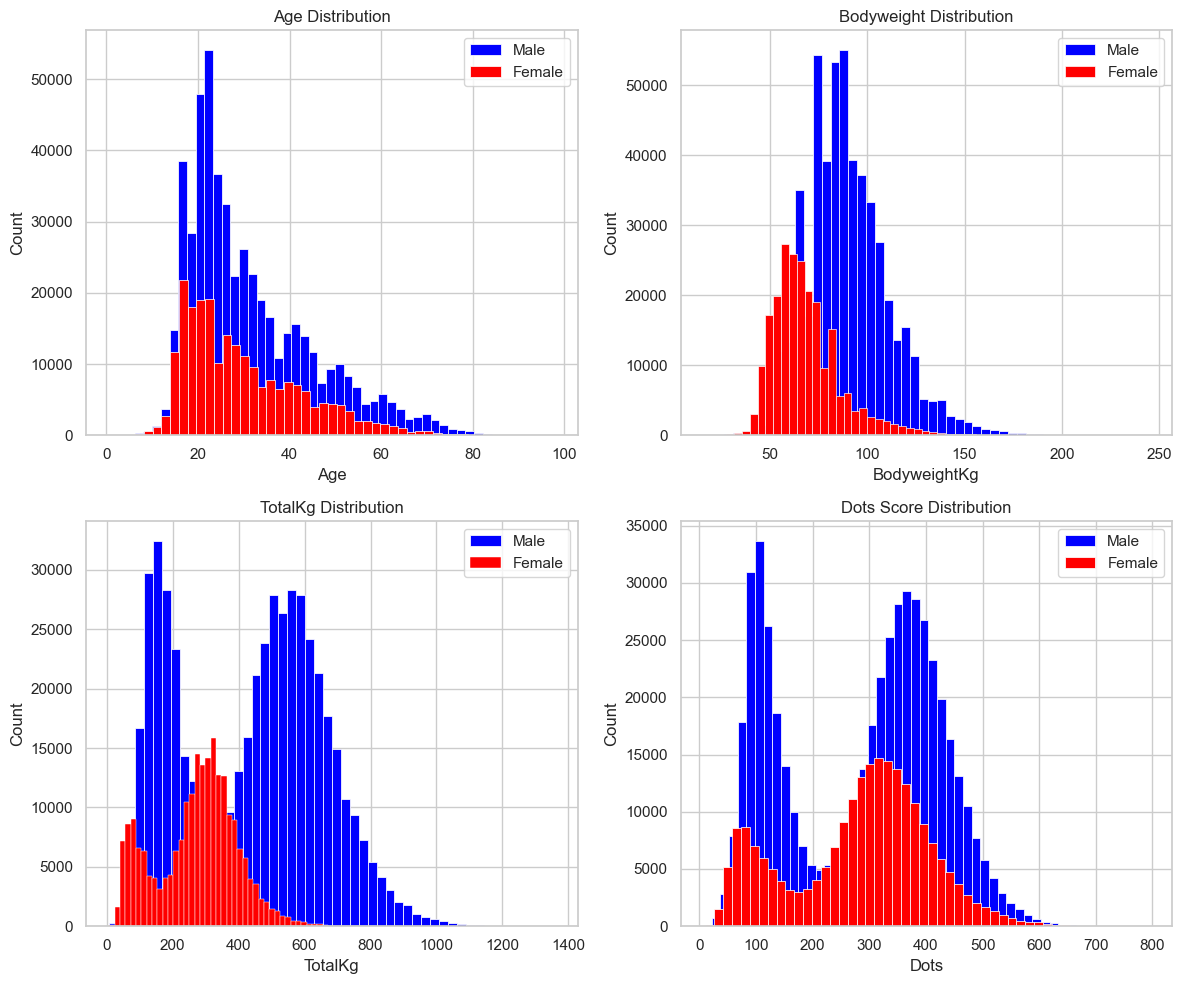

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Age Distribution
sns.histplot(male_data['Age'], bins=50, alpha=1, color='blue', label="Male", ax=axes[0, 0], multiple="dodge")
sns.histplot(female_data['Age'], bins=50, alpha=1, color='red', label="Female", ax=axes[0, 0], multiple="dodge")
axes[0, 0].set_title("Age Distribution")
axes[0, 0].legend()

# Bodyweight Distribution
sns.histplot(male_data['BodyweightKg'], bins=50, alpha=1, color='blue', label="Male", ax=axes[0, 1], multiple="dodge")
sns.histplot(female_data['BodyweightKg'], bins=50, alpha=1, color='red', label="Female", ax=axes[0, 1], multiple="dodge")
axes[0, 1].set_title("Bodyweight Distribution")
axes[0, 1].legend()

# TotalKg Distribution
sns.histplot(male_data['TotalKg'], bins=50, alpha=1, color='blue', label="Male", ax=axes[1, 0], multiple="dodge")
sns.histplot(female_data['TotalKg'], bins=50, alpha=1, color='red', label="Female", ax=axes[1, 0], multiple="dodge")
axes[1, 0].set_title("TotalKg Distribution")
axes[1, 0].legend()

# Dots Score Distribution
sns.histplot(male_data['Dots'], bins=50, alpha=1, color='blue', label="Male", ax=axes[1, 1], multiple="dodge")
sns.histplot(female_data['Dots'], bins=50, alpha=1, color='red', label="Female", ax=axes[1, 1], multiple="dodge")
axes[1, 1].set_title("Dots Score Distribution")
axes[1, 1].legend()

plt.tight_layout()
plt.show()


Amateur Vs Elite 

In [11]:
male_amateur_threshold = 207.5
male_elite_threshold = 600
female_amateur_threshold = 192.5
female_elite_threshold = 352.5

In [12]:
data['Lifter Category'] = 'Intermediate'  # Default category

data.loc[(data['Sex'] == 'M') & (data['TotalKg'] <= male_amateur_threshold), 'Lifter Category'] = 'Amateur'
data.loc[(data['Sex'] == 'M') & (data['TotalKg'] >= male_elite_threshold), 'Lifter Category'] = 'Elite'
data.loc[(data['Sex'] == 'F') & (data['TotalKg'] <= female_amateur_threshold), 'Lifter Category'] = 'Amateur'
data.loc[(data['Sex'] == 'F') & (data['TotalKg'] >= female_elite_threshold), 'Lifter Category'] = 'Elite'

# Summary statistics by Lifter Category
summary = data.groupby(['Sex', 'Lifter Category'])[['Age', 'BodyweightKg', 'TotalKg', 'Dots']].describe()
print(summary)

                          Age                                                \
                        count       mean        std   min   25%   50%   75%   
Sex Lifter Category                                                           
F   Amateur           56941.0  33.669149  15.135615   2.5  21.0  31.5  44.0   
    Elite             57340.0  28.281130   9.645108  12.0  21.0  26.0  34.0   
    Intermediate     112222.0  28.832640  12.632871   4.5  19.0  25.0  36.0   
M   Amateur          128321.0  36.336558  16.690902   0.5  22.0  33.5  48.0   
    Elite            129001.0  29.337707   9.348076   0.5  22.5  27.0  34.0   
    Intermediate     254194.0  29.804287  13.642976   0.5  19.5  25.0  36.5   

                          BodyweightKg              ... TotalKg           \
                      max        count        mean  ...     75%      max   
Sex Lifter Category                                 ...                    
F   Amateur          98.0      56941.0   65.283237  ...  132

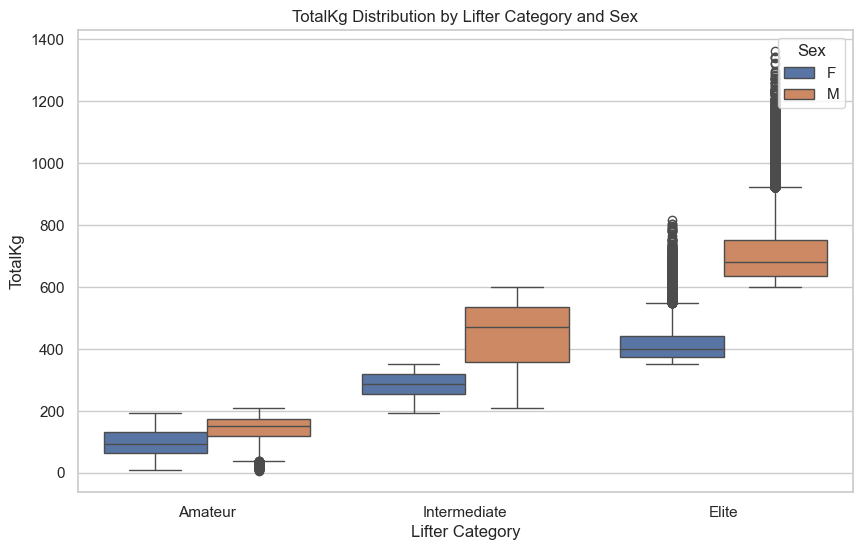

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Lifter Category', y='TotalKg', hue='Sex', data=data)
plt.title("TotalKg Distribution by Lifter Category and Sex")
plt.show()

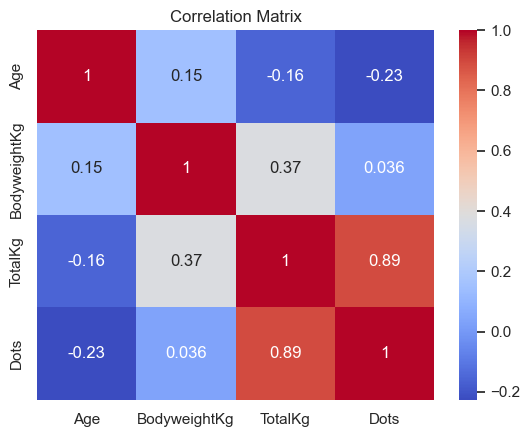

In [14]:
corr_matrix = data[['Age', 'BodyweightKg', 'TotalKg', 'Dots']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()